In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [68]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import numpy.random
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error

pd.set_option('display.max_columns', 500)

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [70]:
train_data=pd.read_csv("train.csv", index_col=0)
test_data=pd.read_csv("test.csv", index_col=0)

In [71]:
print(train_data.shape)

(15000, 69)


## 수치형 변수 box plot->이상치 제거 (train_data)

- familysize plot

<AxesSubplot:>

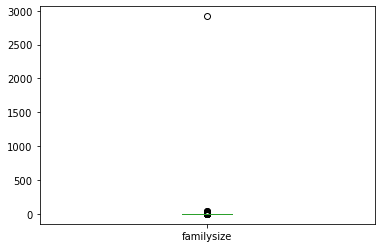

In [5]:
eda1=train_data[['familysize']]
eda1
eda1.plot(kind='box')

- familysize 이상치 제거

In [72]:
train_data = train_data[train_data['familysize'] < 30]
print('이상치 제거 후:',train_data.shape)

이상치 제거 후: (14678, 69)


- age plot

<AxesSubplot:>

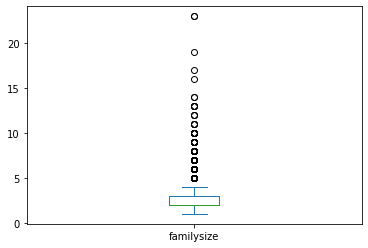

In [7]:
eda1=train_data[['familysize']]
eda1
eda1.plot(kind='box')

- age 이상치 제거

In [73]:
train_data = train_data[train_data['age'] < 90]
print('이상치 제거 후:',train_data.shape)

이상치 제거 후: (14671, 69)


## 범주형변수 시각화
- education, urban, gender, engnat, religion, married, ASD, voted

<BarContainer object of 2 artists>

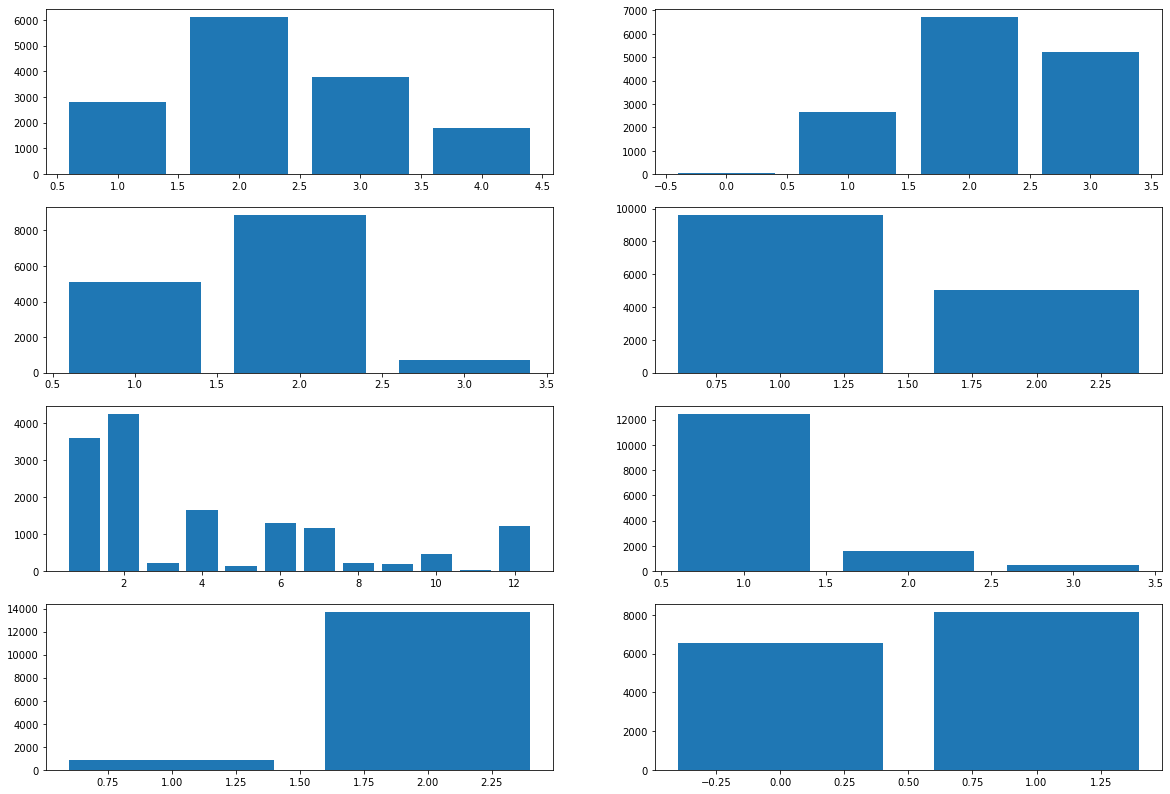

In [74]:
fig,axs=plt.subplots(4,2, figsize=(20,14))
axs[0][0].bar(train_data['education'].value_counts().index, train_data['education'].value_counts().values)
axs[0][1].bar(train_data['urban'].value_counts().index, train_data['urban'].value_counts().values)
axs[1][0].bar(train_data['gender'].value_counts().index,train_data['gender'].value_counts().values)
axs[1][1].bar(train_data['engnat'].value_counts().index, train_data['engnat'].value_counts().values)
axs[2][0].bar(train_data['religion'].value_counts().index,train_data['religion'].value_counts().values)
axs[2][1].bar(train_data['married'].value_counts().index, train_data['married'].value_counts().values)
axs[3][0].bar(train_data['ASD'].value_counts().index, train_data['ASD'].value_counts().values)
#axs[3][1].bar(train_data['voted'].value_counts().index, train_data['voted'].value_counts().values)
axs[3][1].bar(train_data['nerdiness'].value_counts().index, train_data['nerdiness'].value_counts().values)

## TIPI) 결측값 평균값 대체, 전체 역변환

In [75]:
tp_list=[i for i in train_data.columns if 'TIPI' in i]

In [76]:
#변환 전 확인
train_data['orientation'].unique()

array([ 4.,  1.,  2.,  5., nan,  3.])

In [77]:
#결측값 평균값 대체->중앙값 대체(범주형때문)
train_data=train_data.fillna(train_data.median())
test_data=test_data.fillna(test_data.median())

#전체적으로 역변환
train_data[tp_list]=6-train_data[tp_list]
test_data[tp_list]=6-test_data[tp_list]

In [78]:
#변환 후 확인
train_data['orientation'].unique()

array([4., 1., 2., 5., 3.])

## TIPI) 공식대로 계산(5개의 새로운 변수 생성)
- 짝수번호 역변환

In [79]:
train_data['tp_ex']=(train_data['TIPI1']+6-(train_data['TIPI6']))/2
train_data['tp_ag']=(6-(train_data['TIPI2'])+train_data['TIPI7'])/2
train_data['tp_co']=(train_data['TIPI3']+6-(train_data['TIPI8']))/2
train_data['tp_em']=(6-(train_data['TIPI4'])+train_data['TIPI9'])/2
train_data['tp_op']=(train_data['TIPI5']+6-(train_data['TIPI10']))/2

In [80]:
test_data['tp_ex']=(test_data['TIPI1']+6-(test_data['TIPI6']))/2
test_data['tp_ag']=(6-(test_data['TIPI2']+test_data['TIPI7']))/2
test_data['tp_co']=(test_data['TIPI3']+6-(test_data['TIPI8']))/2
test_data['tp_em']=(6-(test_data['TIPI4']+test_data['TIPI9']))/2
test_data['tp_op']=(test_data['TIPI5']+6-(test_data['TIPI10']))/2

In [81]:
#기존 TIPI변수 빼주기(train, test)
train_data.drop(train_data.iloc[:, 30:40], axis=1, inplace=True)
test_data.drop(test_data.iloc[:, 30:40], axis=1, inplace=True)

## 마키아벨리즘 스코어 추가

In [82]:
Answers=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']

<AxesSubplot:>

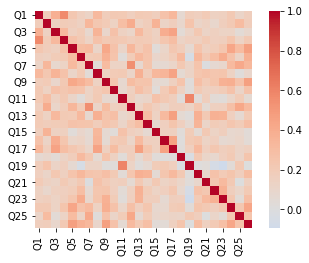

In [83]:
correlations = train_data[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [84]:
train_data['Mach_score'] = train_data[Answers].mean(axis = 1)
test_data['Mach_score'] = test_data[Answers].mean(axis = 1)

In [85]:
#기존 Q1~26 변수 삭제
#train_data.drop(train_data.iloc[:, :26], axis=1, inplace=True)
#test_data.drop(test_data.iloc[:, :26], axis=1, inplace=True)

## VCL 유효성 검사
- 유효하지 않다고 생각하는 문항 삭제(train_data)

In [86]:
#index3=train_data[train_data['VCL12']==1].index
#train_data.drop(index3, inplace=True)
index=train_data[(train_data['VCL6']==1) | (train_data['VCL9']==1) | (train_data['VCL12']==1)].index
train_data.drop(index, inplace=True)
# VCL1~16 문항 삭제(train, test)
# 존재하지 않는 단어 컬럼 삭제
#drop_list_VCL=['VCL6', 'VCL9', 'VCL12']
#train_data.drop(drop_list_VCL, axis=1, inplace=True)
#test_data.drop(drop_list_VCL, axis=1, inplace=True)

#train_data.drop(train_data.iloc[:, 4:20], axis=1, inplace=True)
#test_data.drop(test_data.iloc[:, 4:20], axis=1, inplace=True)

#Q는 안지우고 TIPI만 지웠을 떄 
#train_data.drop(train_data.iloc[:, 30:46], axis=1, inplace=True)
#test_data.drop(test_data.iloc[:, 30:46], axis=1, inplace=True)

## 상관계수 행렬 그래프(train->y(범주형)제외)

In [87]:
corr=train_data.drop(columns='nerdiness').corr(method='pearson')
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True)
#plt.show()

## 삭제할 컬럼 list로 저장, drop

In [88]:
#drop_list=['hand', 'country', 'introelapse', 'testelapse','surveyelapse']
drop_list=['country', 'voted', 'ASD', 'engnat']
train_data.drop(drop_list,axis=1,inplace=True)
test_data.drop(drop_list,axis=1,inplace=True)

In [83]:
#train_data['hand'].unique()
#train_data['country'].unique()
#train_data['introelapse'].unique()
##train_data['testelapse'].unique()
#train_data['surveyelapse'].unique()

array([       6,      120,      100,      139,      216,      176,
            164,      112,      177,      189,      166,      161,
            174,      190,      124,      230,      200,      129,
            207,      145,      104,      162,      167,      123,
            165,      152,       94,      217,     1588,      243,
            179,       98,      210,      287,      394,      114,
            153,      225,      135,      302,      170,      213,
            262,      431,       87,      103,      218,      191,
            194,      208,      234,      339,      449,      264,
            655,      199,      109,      168,      237,      452,
            121,      151,      178,      279,      119,      321,
            411,      967,      241,     3025,      276,       70,
            175,      231,      138,      301,      163,      122,
            315,       90,      110,      155,      198,       85,
            140,      146,      134,      133,      192,      

## 명목형-> str(문자) ->더미변환

In [89]:
train_data['hand']=train_data['hand'].astype('str')
test_data['hand']=test_data['hand'].astype('str')

#train_data['country']=train_data['country'].astype('str')
#test_data['country']=test_data['country'].astype('str')

train_data['education']=train_data['education'].astype('str')
test_data['education']=test_data['education'].astype('str')

train_data['urban']=train_data['urban'].astype('str')
test_data['urban']=test_data['urban'].astype('str')

train_data['gender']=train_data['gender'].astype('str')
test_data['gender']=test_data['gender'].astype('str')

#train_data['engnat']=train_data['engnat'].astype('str')
#test_data['engnat']=test_data['engnat'].astype('str')

train_data['religion']=train_data['religion'].astype('str')
test_data['religion']=test_data['religion'].astype('str')

train_data['married']=train_data['married'].astype('str')
test_data['married']=test_data['married'].astype('str')

#train_data['ASD']=train_data['ASD'].astype('str')
#test_data['ASD']=test_data['ASD'].astype('str')

#train_data['voted']=train_data['voted'].astype('str')
#test_data['voted']=test_data['voted'].astype('str')

train_data['orientation']=train_data['orientation'].astype('str')
test_data['orientation']=test_data['orientation'].astype('str')

In [90]:
#더미변환
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)
print(train_data.shape, test_data.shape)

(10556, 88) (35452, 87)


## 전체적으로 결측값 제거

In [91]:
#결측치 제거(train)
#train_data.dropna(inplace=True)

## train/test 분리
- train_data에서 y컬럼 분리

In [92]:
from sklearn.model_selection import train_test_split
y_train=train_data['nerdiness']
#train_y = 2 - train_y.to_numpy()
train_data.drop('nerdiness',axis=1,inplace=True)
#train_x=train_data
#test_x=test_data
X_train=train_data
X_test=test_data

In [93]:
#X_train.shape

(10556, 87)

In [94]:
#y_train.shape

(10556,)

In [95]:
#X_train, X_test, y_train, y_test=train_test_split(train_x, train_y, test_size=0.3, shuffle=True, stratify=train_y, random_state=123)

In [96]:
#X_train

## 모델링

In [97]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 100, n_estimators = 200)

In [98]:
rf.fit(X_train, y_train)
#pred=rf.predict(X_test)
#accuracy_score(y_test, pred)

RandomForestClassifier(max_depth=100, n_estimators=200)

In [ ]:
#xgb
#from xgboost import XGBClassifier, XGBRegressor
#xgbc=XGBClassifier(random_state=42)
#xgbc.fit(X_train, y_train)
#pred=xgbc.predict(X_test)
#accuracy_score(y_test, pred)

In [ ]:
#plt.figure(figsize=(10,100))
#sns.barplot(y=X_train.columns.tolist(), x=xgbc.feature_importances_, edgecolor=(0,0,0))
#plt.show()

In [ ]:
#lgbm
#from lightgbm import LGBMClassifier, LGBMRegressor
#lgbc=LGBMClassifier(random_state=42)
#lgbc.fit(X_train, y_train)
#pred=lgbc.predict(X_test)
#accuracy_score(y_test, pred)

In [ ]:
#pred_test=model.predict(X_test)
#pred_test=pd.DataFrame(pred_test)
#pred_test.columns=['pred_y']
#print(pred_test.head(5))

In [100]:
#제출용
pred_test=rf.predict(test_x)
pred_test=pd.DataFrame(pred_test)
pred_test.columns=['pred_y']
print(pred_test.head(5))
result=pred_test['pred_y']

   pred_y
0       1
1       1
2       1
3       1
4       1


In [101]:
submission = pd.DataFrame({'index' :test_data.index, 'nerdiness':result})
submission.to_csv('submission_rf6.csv',index=False)

In [102]:
data=pd.read_csv("submission_rf6.csv")

In [103]:
data.head(15)

,index,nerdiness
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,0
6,6,1
7,7,1
8,8,0
9,9,0


### 